In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
# Load the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
# Split the data into test/train sets
from sklearn.model_selection import train_test_split

penguins = penguins[['Species', 'Culmen Length (mm)', 
                     'Culmen Depth (mm)', 'Flipper Length (mm)', 
                     'Body Mass (g)', 'Sex']]
penguins = penguins.dropna()
# make sure that the random values that your code will generate 
# will be the same every time you run the code.
np.random.seed(3354354524)

# Since Species is the target variable...
X = penguins.drop(['Species'], axis = 1)
y = penguins['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
# Clean and transform the data

def clean_penguin_data(x_train, x_test, Y_train, Y_test):
    '''
    clean_penguin_data takes in the four train/test sets as parameters
    and cleans the data for each and then returns the cleaned copies back
    '''
    xtr = x_train.copy()
    xt = x_test.copy()
    le = preprocessing.LabelEncoder()
    xtr['Sex'] = le.fit_transform(x_train['Sex'])
    Y_train = le.fit_transform(Y_train)
    xt['Sex'] = le.fit_transform(x_test['Sex'])
    Y_test = le.fit_transform(Y_test)
    
    return (xtr, xt, Y_train, Y_test)

X_train, X_test, y_train, y_test = clean_penguin_data(X_train, X_test, y_train, y_test)

In [5]:
# Select 3 columns (features)

from sklearn.feature_selection import f_classif
threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(X_train, y_train)[0]
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
      print(f_name, score)
      high_score_features.append(f_name)

Flipper Length (mm) 455.7072058518755
Culmen Depth (mm) 315.4109641320591
Culmen Length (mm) 308.22792100679123
Body Mass (g) 270.64662388142307
Sex 0.3421039825847912


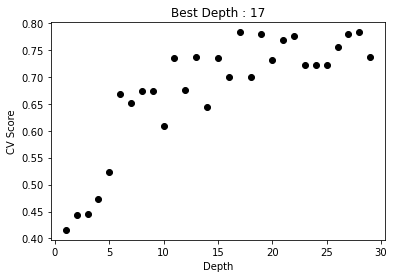

In [6]:
# Use cross-validation

# First, drop the columns that aren't being used anymore
X = penguins.drop(['Species', 'Culmen Length (mm)', 'Body Mass (g)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = clean_penguin_data(X_train, X_test, y_train, y_test)

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

fig, ax = plt.subplots(1)
best_score = 0

# For 30 depths, find the highest score to find the best depth
for d in range(1,30):
    clf = MLPClassifier(hidden_layer_sizes=(d, d, d), max_iter=3000)
    cv_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
        
l = ax.set(title = "Best Depth : " + str(best_depth),
xlabel = "Depth",
ylabel = "CV Score")

In [7]:
# Train an MLPClassifier at best complexity, and evaluate the model on the test set

clf = MLPClassifier(hidden_layer_sizes=(17, 17, 17), max_iter=3000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8507462686567164

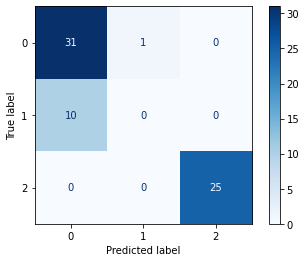

In [8]:
# Create and comment on a confusion matrix 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
c = confusion_matrix(y_train, y_train_pred)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

In [13]:
x0 = X['Flipper Length (mm)']
x1 = X['Culmen Depth (mm)']

In [17]:
x1, x0

(0      18.7
 1      17.4
 2      18.0
 4      19.3
 5      20.6
        ... 
 338    13.7
 340    14.3
 341    15.7
 342    14.8
 343    16.1
 Name: Culmen Depth (mm), Length: 334, dtype: float64,
 0      181.0
 1      186.0
 2      195.0
 4      193.0
 5      190.0
        ...  
 338    214.0
 340    215.0
 341    222.0
 342    212.0
 343    213.0
 Name: Flipper Length (mm), Length: 334, dtype: float64)

In [19]:
grid_x = np.linspace(x0.min(),x0.max(),501)
grid_y = np.linspace(x1.min(),x1.max(),501)
xx, yy = np.meshgrid(grid_x, grid_y)

In [20]:
XX = xx.ravel()
YY = yy.ravel()
XY = np.c_[XX, YY]

In [21]:
XY

array([[172.   ,  13.1  ],
       [172.118,  13.1  ],
       [172.236,  13.1  ],
       ...,
       [230.764,  21.5  ],
       [230.882,  21.5  ],
       [231.   ,  21.5  ]])

In [55]:
p = clf.predict(XY)
p = p.reshape(xx.shape)
print(len(p))
counter = 0
for num in p:
    if num.all() == 0:
        counter += 1
print(counter)
    

501
501


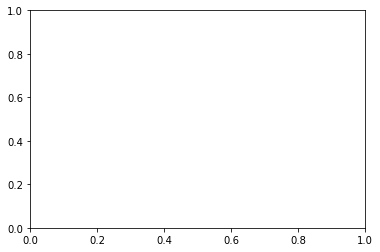

In [26]:
fig, ax = plt.subplots(1)

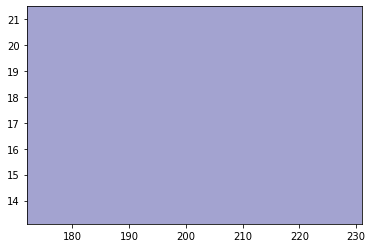

In [28]:
ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
fig

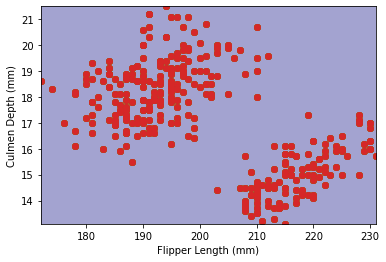

In [39]:
ax.scatter(x0, x1, cmap = "jet", vmin = 0, vmax = 2)
fig

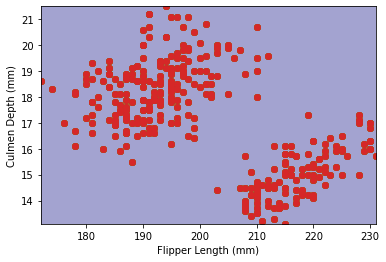

In [40]:
ax.set(xlabel = "Flipper Length (mm)", ylabel = "Culmen Depth (mm)")
fig